<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_4_1_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install R package numOSL by Peng et al.
install.packages('lamW')
install.packages('minpack.lm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# FITTING ESR DOSE RESPONSE WITH PKC EQUATION

Electron spin resonance (ESR) signals are often measured simultaneously with TL and/or
OSL with the same sample. These combined types of experiments produce
important information about the underlying luminescence mechanisms,
as well as about the nature of the trapping and luminescence centers.

ESR is used for the study of materials which exhibit
paramagnetism, because of the magnetic moment of unpaired electrons. The
same impurity centers may be associated with TL or OSL, either acting
as the charge-carrier traps, or as recombination centers. They may
also be responsible for optical absorption. 

Since ESR is normally capable of identifying the impurities in the
crystal, in cases where the simultaneous TL-ESR measurements show
a direct relation between the two phenomena, the identification by
ESR may serve as a direct proof for the identity of the impurity involved
in the luminescence process.

CODE 4.4 shows an example of the dose
dependence of an ESR signal in quartz from Duval {duval2012}.
This author measured the dose response curves of the Al center for
15 sedimentary quartz samples from the Iberian Peninsula. The samples
were irradiated up to a maximum dose of 23-40 kGy. It was found that
the ESR signal grows almost linearly with the absorbed dose for doses
above about 4 kGy. 


fitted N:  103.5203
fitted R:  -0.001410007
fitted Dc:  4530132  Gy

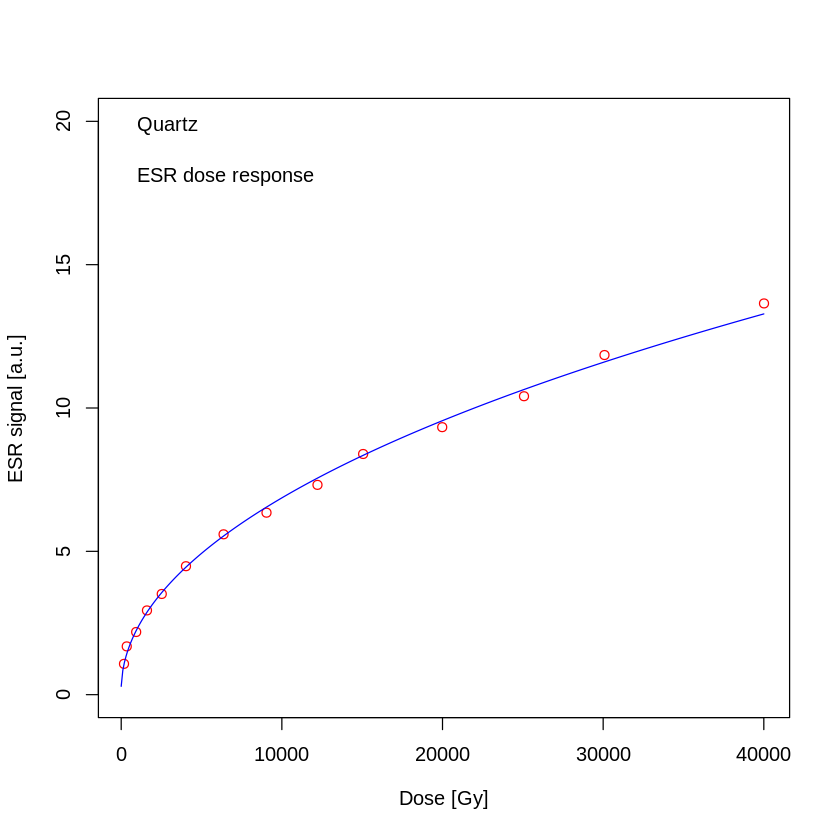

In [2]:
rm(list=ls())
options(warn=-1)

# Load the data
TLqzx<-c(174.13, 345.027, 931.847, 1603.74, 2524.39, 4031.12, 6372.18, 
         9044.09, 12217.5, 15058.3, 19981.5, 25072.3, 30082.3, 40011.4)
TLqzy<-c(1.07478, 1.68389, 2.18591, 2.93875, 3.51271, 4.48122, 5.59377, 
         6.3484, 7.3184, 8.39557, 9.33133, 10.4105, 11.8478, 13.6478)

# plot the ESR vs dose data
plot(TLqzx,TLqzy,type="p",pch=1,col="red",xlab=expression("Dose [Gy]"), 
     ylab = "ESR signal [a.u.]",ylim=c(0,20))
legend("topleft",bty = "n",legend = c("Quartz"," ","ESR dose response"))

library("lamW")
library("minpack.lm")

## fit to saturation exponential ----
t <-TLqzx
y<-TLqzy 
fit_data <-data.frame(  t ,y)
#plot(fit_data,ylim=c(0,max(y)))
fit <- minpack.lm::nlsLM(
  formula = y ~ N * (1+lambertW0((R-1)*exp(R-1-b* t))/(1-R)),
  data = fit_data,
  start = list(N= max(y),R=.9, b = .01)
)
N_fit <- coef(fit)[1]
R_fit <- coef(fit)[2]
b_fit <- coef(fit)[3]
## plot analytical solution
## plot analytical solution
t<- seq(from=0,to=40000,by=100)
lines(
  x = t,
  y = N_fit * (1+lambertW0((R_fit-1)*exp(R_fit-1-b_fit* t))/(1-R_fit)),
  col = "blue")


## print results
cat("\nfitted N: ", N_fit)
cat("\nfitted R: ", R_fit)
cat("\nfitted Dc: ", 1/b_fit, " Gy")

# CODE 4.5 FITTING DOSE RESPONSE DATA FROM SAR-OSL EXPERIMENTS

The following Code 4.5 analyzes SAR-OSL experimental dose response curves
by Timar-Gabor et al. \cite{Timar-Gabor_2012} (their Figure 3), for
fine grain and coarse grain quartz samples in a loess-palaeosol sequence.
The data shown here are for samples MV 10 and MV 8, and were fitted
by these authors using a DSE. 

The solid lines in the figure are the least squares fits using the PKC equation,
showing that the Lambert function can be used to describe both types
of dose responses in quartz with a smaller number of parameters than
the double saturating exponential (DSE), even at the high doses involved in this experiment. 





Fine grain  
fitted N:  17.57116
fitted R:  0.3971653
fitted Dc:  1325.83 Gy

Coarse grain  
fitted N:  6.610194
fitted R:  9.212141e-07
fitted Dc:  403.02  Gy

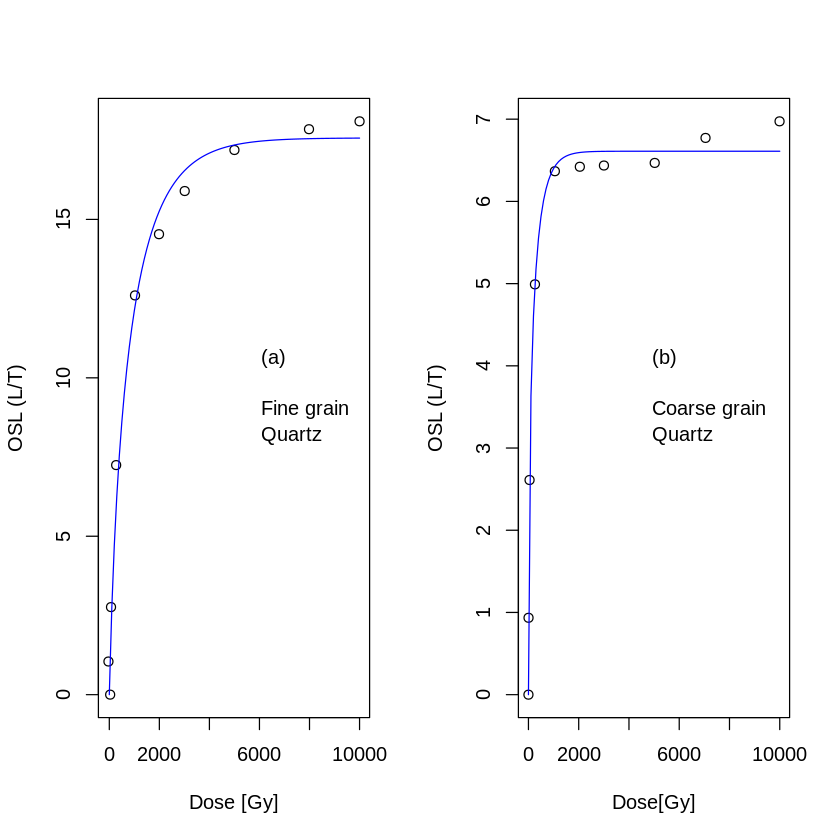

In [4]:
rm(list = ls(all=T))
options(warn=-1)

# load s
library("minpack.lm")
library("lamW")
par(mfrow=c(1,2))
## fit to saturation exponential ----
t = c(-34.2466, 34.2466, 68.4932, 273.973, 1027.4,1986.3,3013.7,
      5000, 7979.45, 10000)
y = c(1.04664, 0.000978474, 2.76386, 7.24592,12.6008,14.5329,
      15.8956,  17.1905, 17.847, 18.0952)
fit_data <-data.frame(  t ,y)
plot(fit_data,ylim=c(0,max(y)),xlab="Dose [Gy]",
ylab="OSL (L/T)")
fit <- minpack.lm::nlsLM(
formula=y~N*(1+lambertW0((abs(R)-1)*
exp(abs(R)-1-b*t))/(1-abs(R))),
  data = fit_data,
  start = list(N= max(y),R=.9, b = .01))
N_fit <- coef(fit)[1]
R_fit <- abs(coef(fit)[2])
b_fit <- coef(fit)[3]
## plot analytical solution
t<- seq(from=0,to=10000,by=100)
lines(  x = t,
y=N_fit*(1+lambertW0((R_fit-1)*exp(R_fit-1-b_fit* t))/
(1-R_fit)),  col = "blue")
legend("right",bty="n",legend=c("(a)"," ","Fine grain",
"Quartz"," "))
## print results
cat("\nFine grain"," ")
cat("\nfitted N: ", N_fit)
cat("\nfitted R: ", R_fit)
cat("\nfitted Dc: ",round( 1/b_fit,2), "Gy\n")
## fit to Lambert equation ----
t = c(0, 3.5583, 44.1822, 258.718, 1051.62, 2044.98, 3003.94,
      5024.61, 7046.32, 9992.29)
y = c(0, 0.93512, 2.61108, 4.99104, 6.36704, 6.42148, 
      6.43643, 6.46792, 6.77215, 6.97391)
fit_data <-data.frame(  t ,y)
plot(fit_data,ylim=c(0,max(y)),xlab="Dose[Gy]",ylab="OSL (L/T)")
fit <- minpack.lm::nlsLM(
formula=y~N*(1+lambertW0((abs(R)-1)*
exp(abs(R)-1-b*t))/(1-abs(R))),
  data = fit_data,
  start = list(N= max(y),R=10, b = 1e-4))
N_fit <- coef(fit)[1]
R_fit <- abs(coef(fit)[2])
b_fit <- coef(fit)[3]
## plot analytical solution
t<- seq(from=0,to=10000,by=100)
lines(  x = t,
y=N_fit*(1+lambertW0((R_fit-1)*exp(R_fit-1-b_fit*t))/(1-R_fit)),
  col = "blue")
legend("right",bty="n",legend=c("(b)"," ","Coarse grain",
"Quartz"," "))
## print results
cat("\nCoarse grain"," ")
cat("\nfitted N: ", N_fit)
cat("\nfitted R: ", R_fit)
cat("\nfitted Dc: ",round( 1/b_fit,2)," Gy")